# Airline Passenger Satisfaction Project

In [2]:
# EDA için kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Data link
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

# Data is given in 2 part train and test split ratio is %80 to train and %20 to test.

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df=pd.concat([df,df_test],ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [7]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

## There are few missing lines in only one column of this data. 
## Filling with median value of the column is okay, since the missing part of the data percentage is very low and it is "arrival time delay" column so, logically it is fine as well. Also data's central tendency is positively skewed so instead of mean, median is chosen.

In [8]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace=True)

## Filling with mean or median values depends on central tendency if the data is numeric or removing missing rows are the most common ways to handle missing data. However, there are many methods as shown in the figure below.

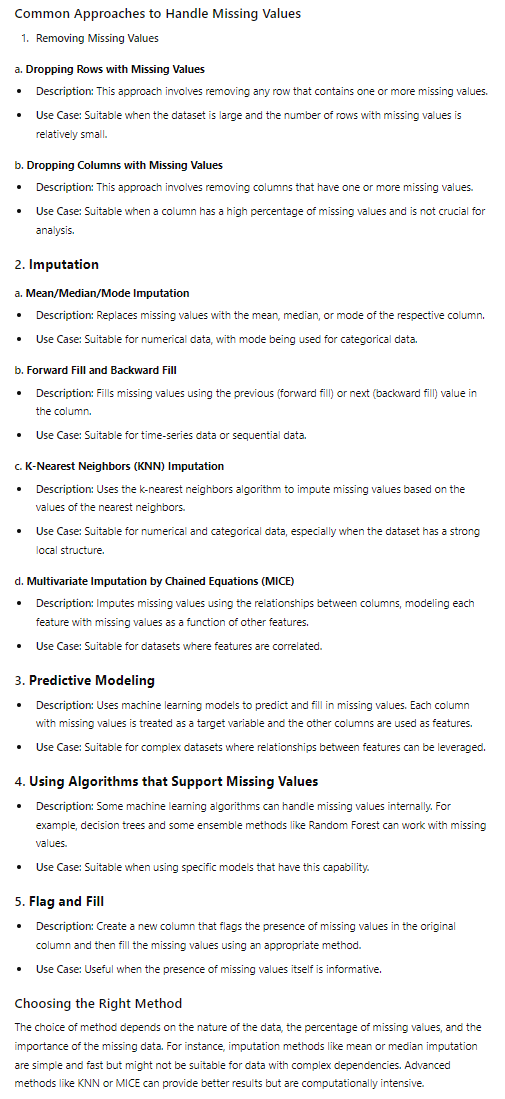

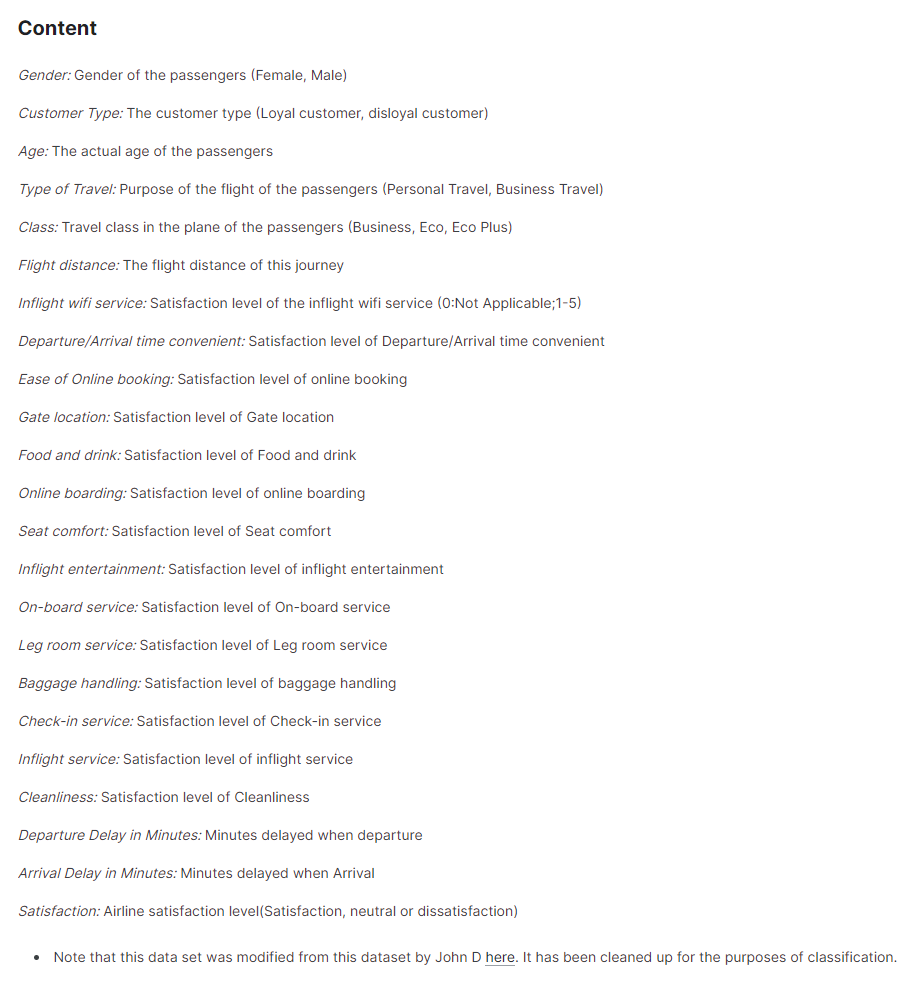

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Dropping unnecessary columns

In [10]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

# EDA & DATA VISULATION

In [11]:
for i in df.columns:
  a=len(list(df[i].unique()))
  print(f"Unique value length of '{i}' is: {a}")

Unique value length of 'Gender' is: 2
Unique value length of 'Customer Type' is: 2
Unique value length of 'Age' is: 75
Unique value length of 'Type of Travel' is: 2
Unique value length of 'Class' is: 3
Unique value length of 'Flight Distance' is: 3821
Unique value length of 'Inflight wifi service' is: 6
Unique value length of 'Departure/Arrival time convenient' is: 6
Unique value length of 'Ease of Online booking' is: 6
Unique value length of 'Gate location' is: 6
Unique value length of 'Food and drink' is: 6
Unique value length of 'Online boarding' is: 6
Unique value length of 'Seat comfort' is: 6
Unique value length of 'Inflight entertainment' is: 6
Unique value length of 'On-board service' is: 6
Unique value length of 'Leg room service' is: 6
Unique value length of 'Baggage handling' is: 5
Unique value length of 'Checkin service' is: 6
Unique value length of 'Inflight service' is: 6
Unique value length of 'Cleanliness' is: 6
Unique value length of 'Departure Delay in Minutes' is: 46

# Checking whether the dataset it is imbalanced or not and it seems data is considered BALANCED.

In [12]:
df['satisfaction'].value_counts(normalize = True)

satisfaction
neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: proportion, dtype: float64

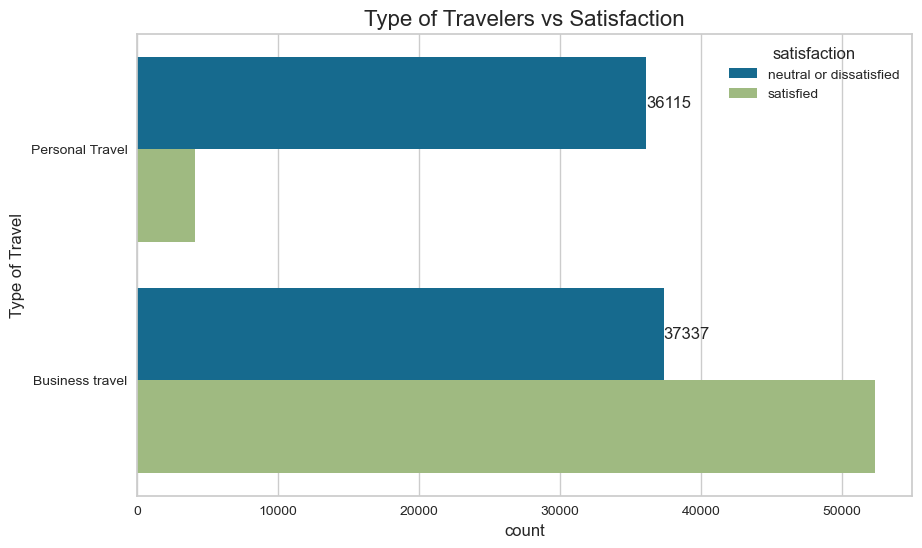

In [13]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Type of Travel'], hue = df['satisfaction'])
plt.title("Type of Travelers vs Satisfaction", fontsize = 16)
ax.bar_label(ax.containers[0]);

## There is a huge gap between Personel Travelers and Business Travelers in terms of satisfaction. Could be useful information for further investigation.

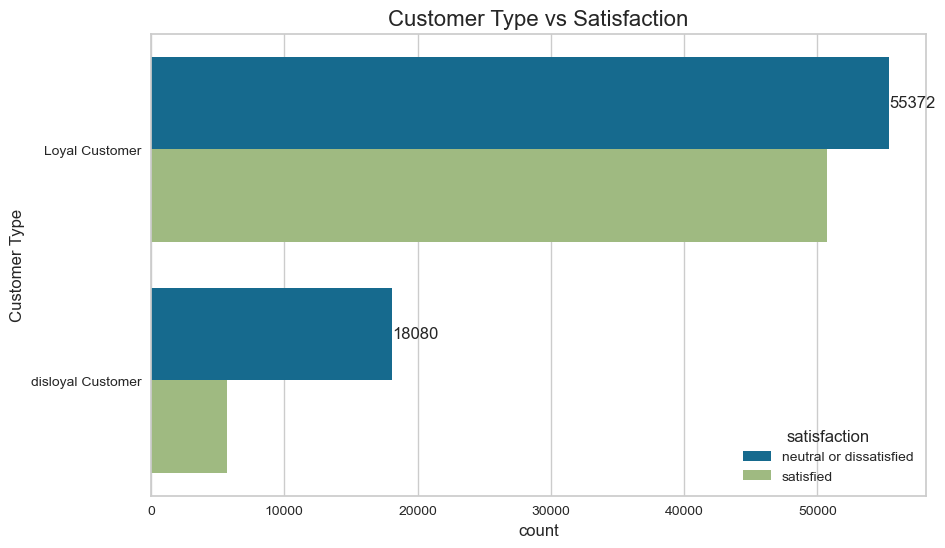

In [14]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Customer Type'], hue = df['satisfaction'])
plt.title("Customer Type vs Satisfaction", fontsize = 16)
ax.bar_label(ax.containers[0]);

## As it is expected, Loyal customers are tend to satisfied more then disloyal customers.

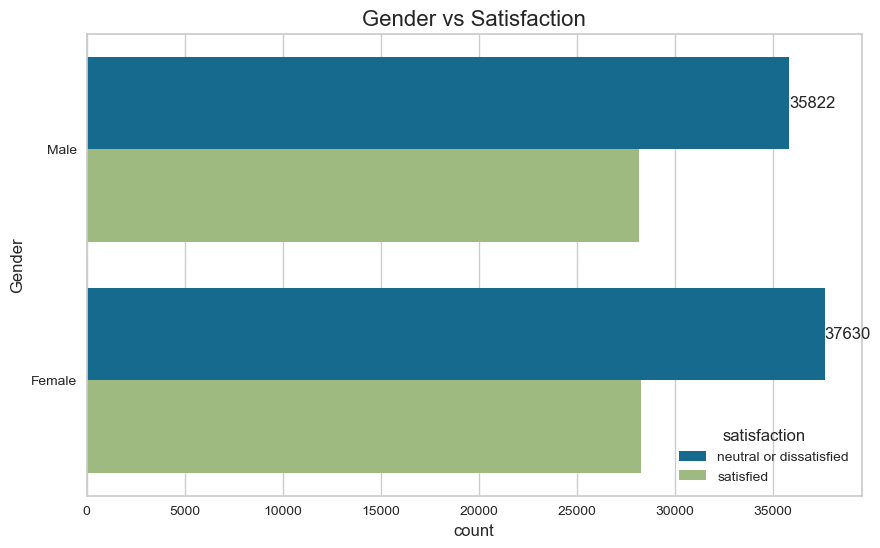

In [15]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Gender'], hue = df['satisfaction'])
plt.title("Gender vs Satisfaction", fontsize = 16)
ax.bar_label(ax.containers[0]);

## Genders are seems to have no effect in satisfaction results in general. However, this types of distributioned columns are could be viable and valuable for ML modeling due to their nature to find different combinations.

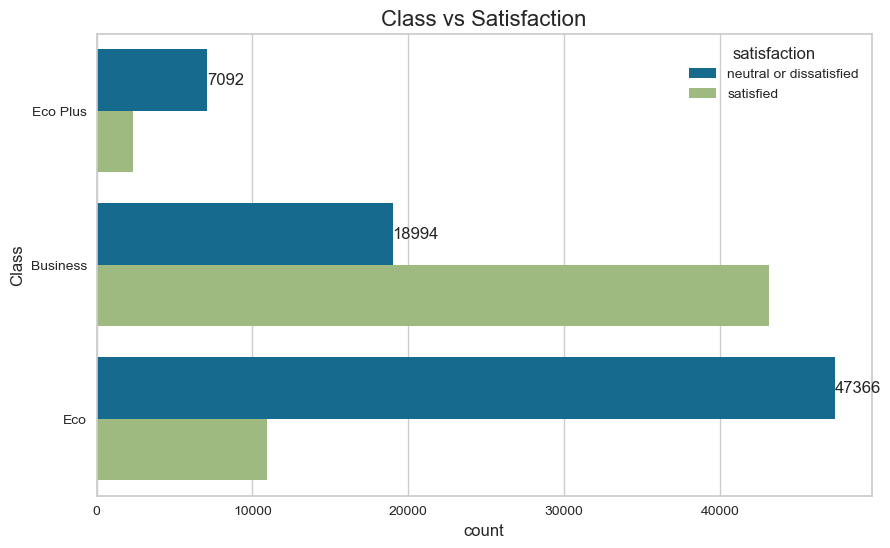

In [16]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Class'], hue = df['satisfaction'])
plt.title("Class vs Satisfaction", fontsize = 16)
ax.bar_label(ax.containers[0]);

## There is a significant difference between Business class and other ECO classes in terms of satisfaction level.

## Analysing age distribution with satisfaction level.

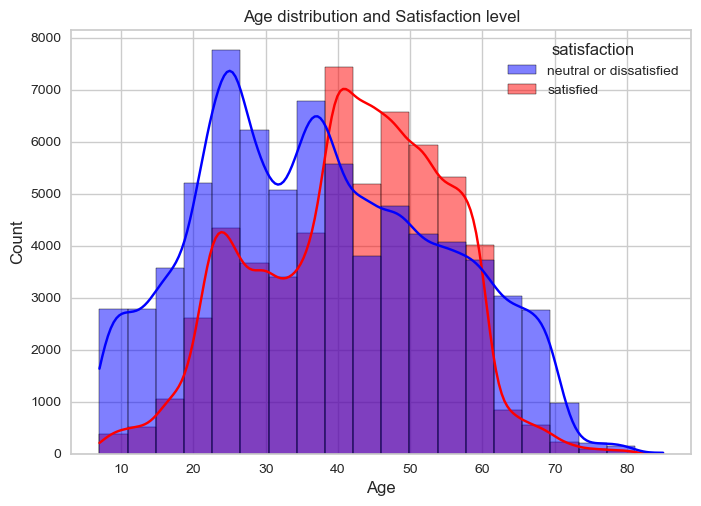

In [17]:
sns.histplot(x=df["Age"],bins=20 ,kde=True, hue=df['satisfaction'], palette={'satisfied': 'red', 'neutral or dissatisfied': 'blue'})
plt.title("Age distribution and Satisfaction level")
plt.show()

## It seems that from the figure above, customers age between 40-60 seems to satisfied way more than younger (<40) and senior (60+) customers.

## Analysing and filtering huge outliers in arrival departure delays in minutes.

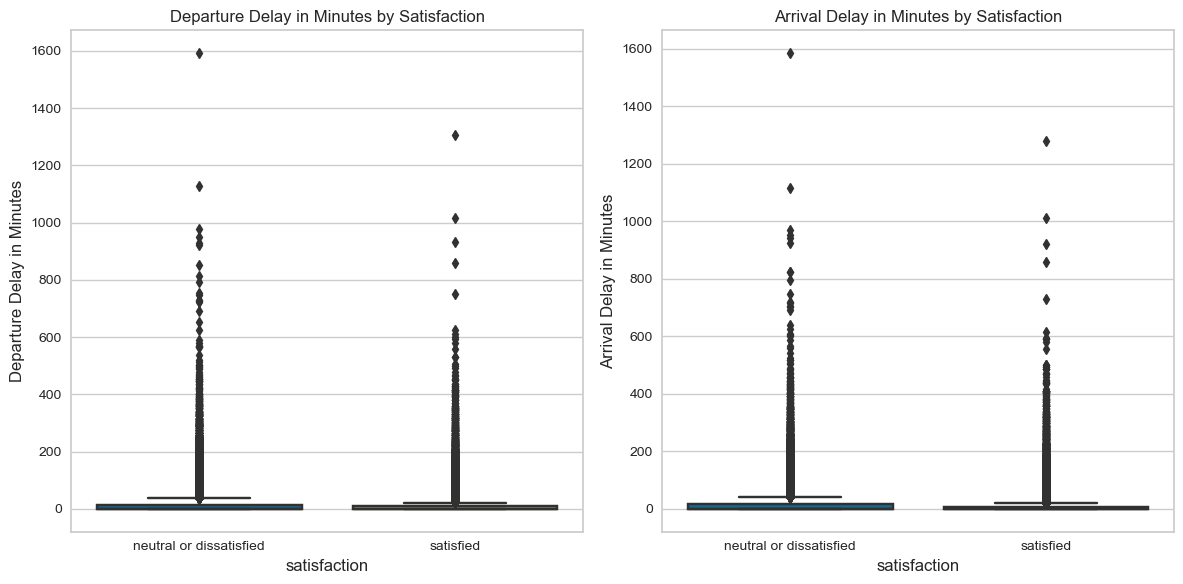

In [18]:
# Set the figure size
plt.figure(figsize=(12, 6))

# First subplot: Departure Delay in Minutes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df)
plt.title("Departure Delay in Minutes by Satisfaction")

# Second subplot: Arrival Delay in Minutes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df)
plt.title("Arrival Delay in Minutes by Satisfaction")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:
df = df[(df['Departure Delay in Minutes'] <= 600) & (df['Arrival Delay in Minutes'] <= 600)]

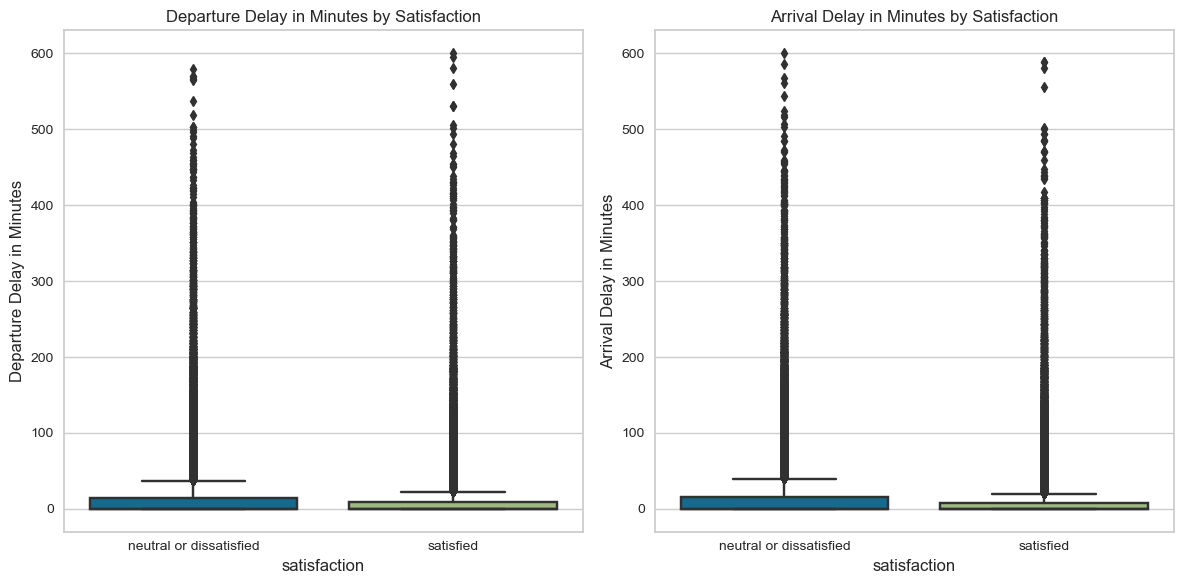

In [20]:
# Set the figure size
plt.figure(figsize=(12, 6))

# First subplot: Departure Delay in Minutes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df)
plt.title("Departure Delay in Minutes by Satisfaction")

# Second subplot: Arrival Delay in Minutes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df)
plt.title("Arrival Delay in Minutes by Satisfaction")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Analysing the distributions of satisfaction levels in some important features. 0 is the lowest and 5 is the highest 

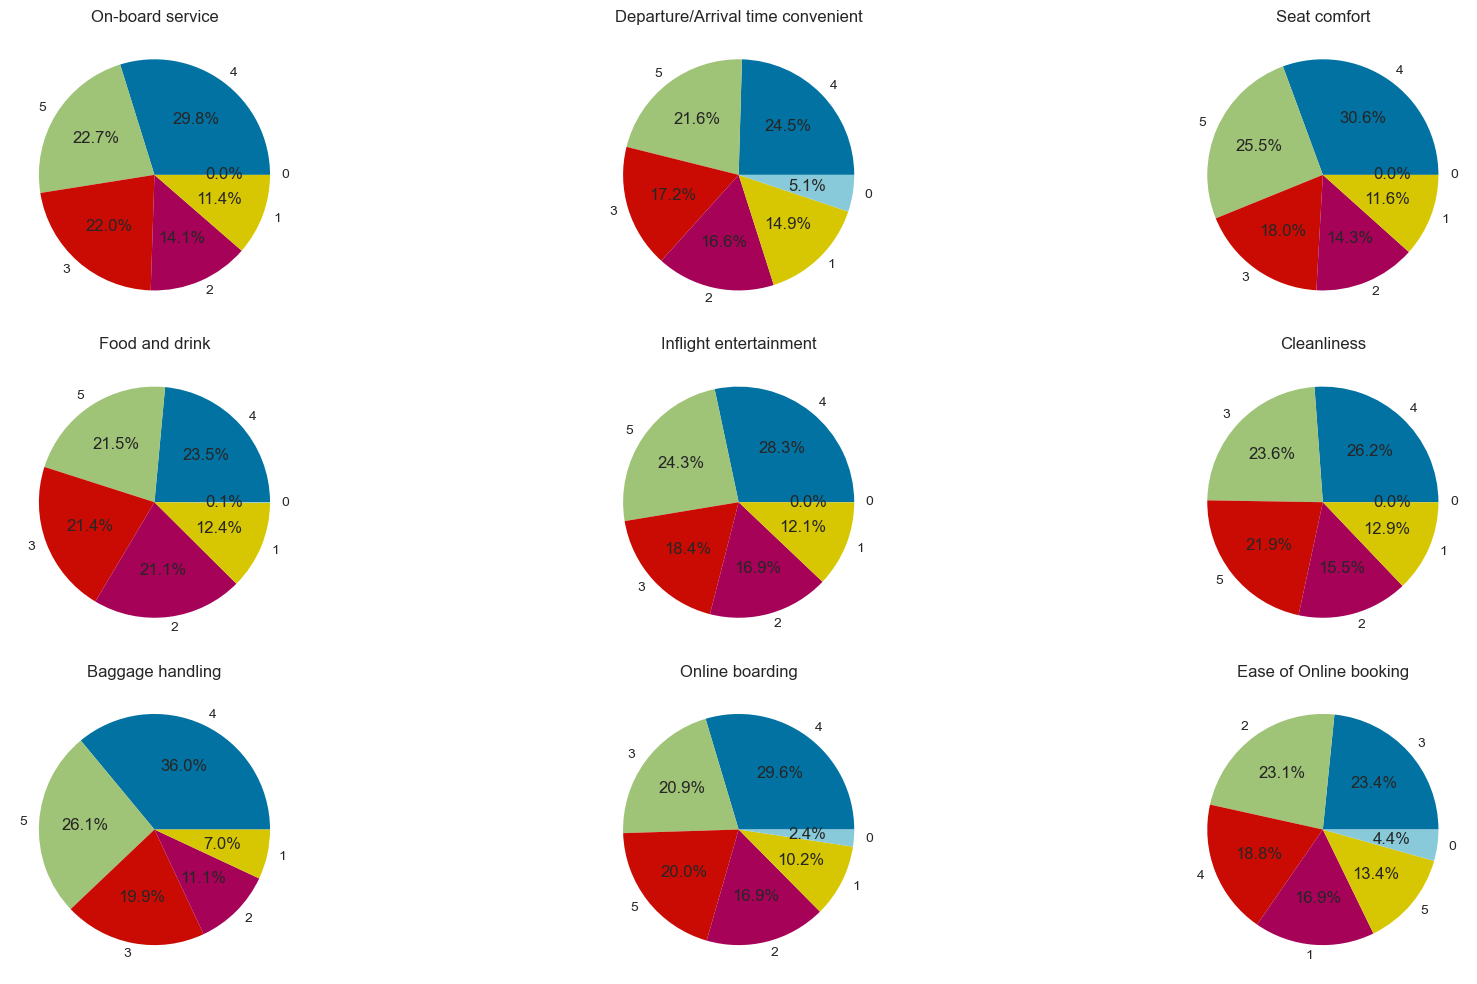

In [21]:
def plot_pie(data, column, ax):
    data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
    ax.set_ylabel('')
    ax.set_title(column)

# Set the figure size
fig, axs = plt.subplots(3, 3, figsize=(20, 10)) 

# List of columns to plot
columns = ['On-board service', 'Departure/Arrival time convenient', 'Seat comfort',
           'Food and drink', 'Inflight entertainment', 'Cleanliness',
           'Baggage handling','Online boarding','Ease of Online booking']

# Plot each column in a pie chart
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_pie(df, column, axs[row, col])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Same 9 features with satisfaction seperated form in bar graph.

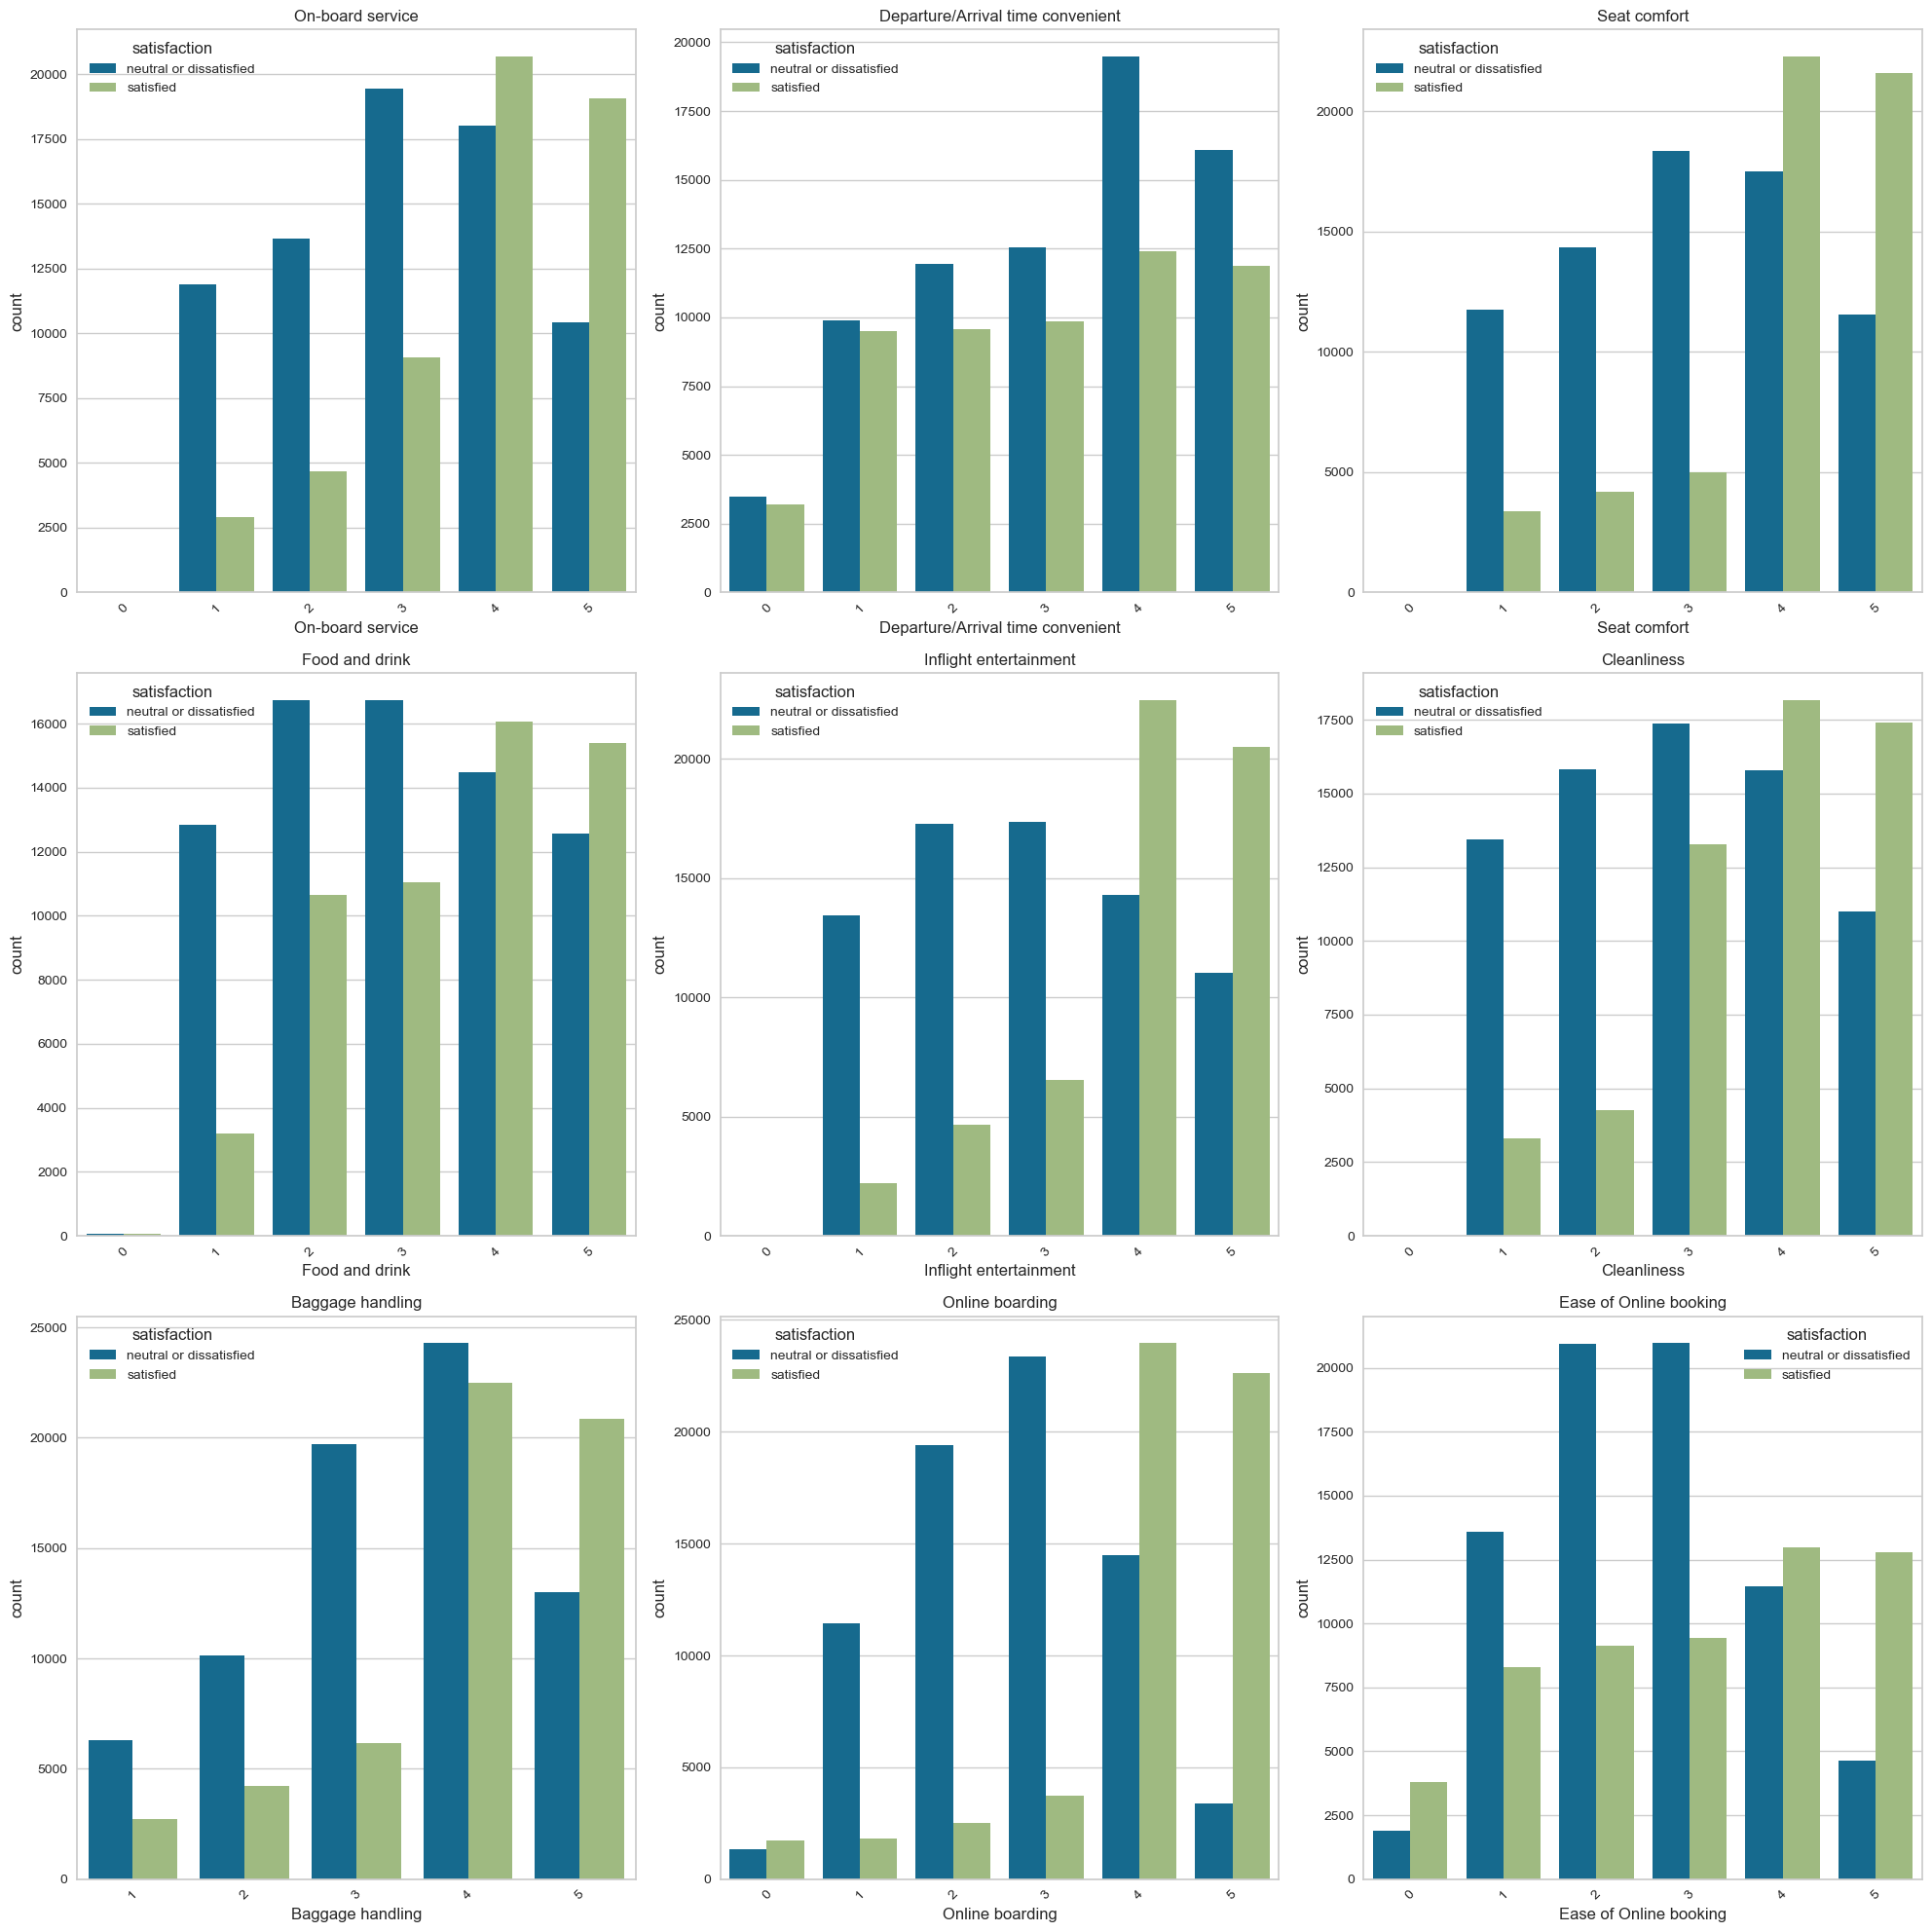

In [22]:
# Function to plot countplots
def plot_count(data, column, subplot_index, total_subplots):
    plt.subplot(total_subplots[0], total_subplots[1], subplot_index)
    sns.countplot(data=data, x=column, hue='satisfaction')
    plt.title(column)
    plt.xticks(rotation=45)

# Set the figure size
plt.figure(figsize=(20, 20))

# List of columns to plot
columns = ['On-board service', 'Departure/Arrival time convenient', 'Seat comfort',
           'Food and drink', 'Inflight entertainment', 'Cleanliness',
           'Baggage handling', 'Online boarding', 'Ease of Online booking']

# Number of rows and columns for subplots
total_subplots = (3, 3)  # 3 rows, 3 columns

# Plot each column in a countplot
for i, column in enumerate(columns):
    plot_count(df, column, i + 1, total_subplots)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Encoding & Heatmap

In [23]:
# Finding non-numeric features to encoding process.
categoricial_features= df.select_dtypes("object").columns
categoricial_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [24]:
# Function for encoding data sets. Can be used on both train and test
def encode_features(df):
    # Gender: Female = 0, Male = 1
    df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

    # Customer type: Loyal Customer = 0, Disloyal Customer = 1
    df['Customer Type'] = df['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)

    # Type of travel: Personel Travel = 0, Business Travel = 1
    df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 0 if x == 'Personel Travel' else 1)

    # Class: Eco = 0, Eco Plus = 1, Business = 2
    class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
    df['Class'] = df['Class'].map(class_mapping)

    # Encoding target variable satisfaction: satisfied customers = 0, neutral or dissatisfied customers = 1
    df['satisfaction'] = df['satisfaction'].apply(lambda x: 0 if x == 'satisfied' else 1)
    
    return df

In [25]:
encode_features(df)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,1
1,1,1,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,1
2,0,0,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,0
3,0,0,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,1
4,1,0,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,1,2,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,1
129876,1,0,23,1,2,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,0
129877,0,0,17,1,0,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,1
129878,1,0,14,1,2,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,0


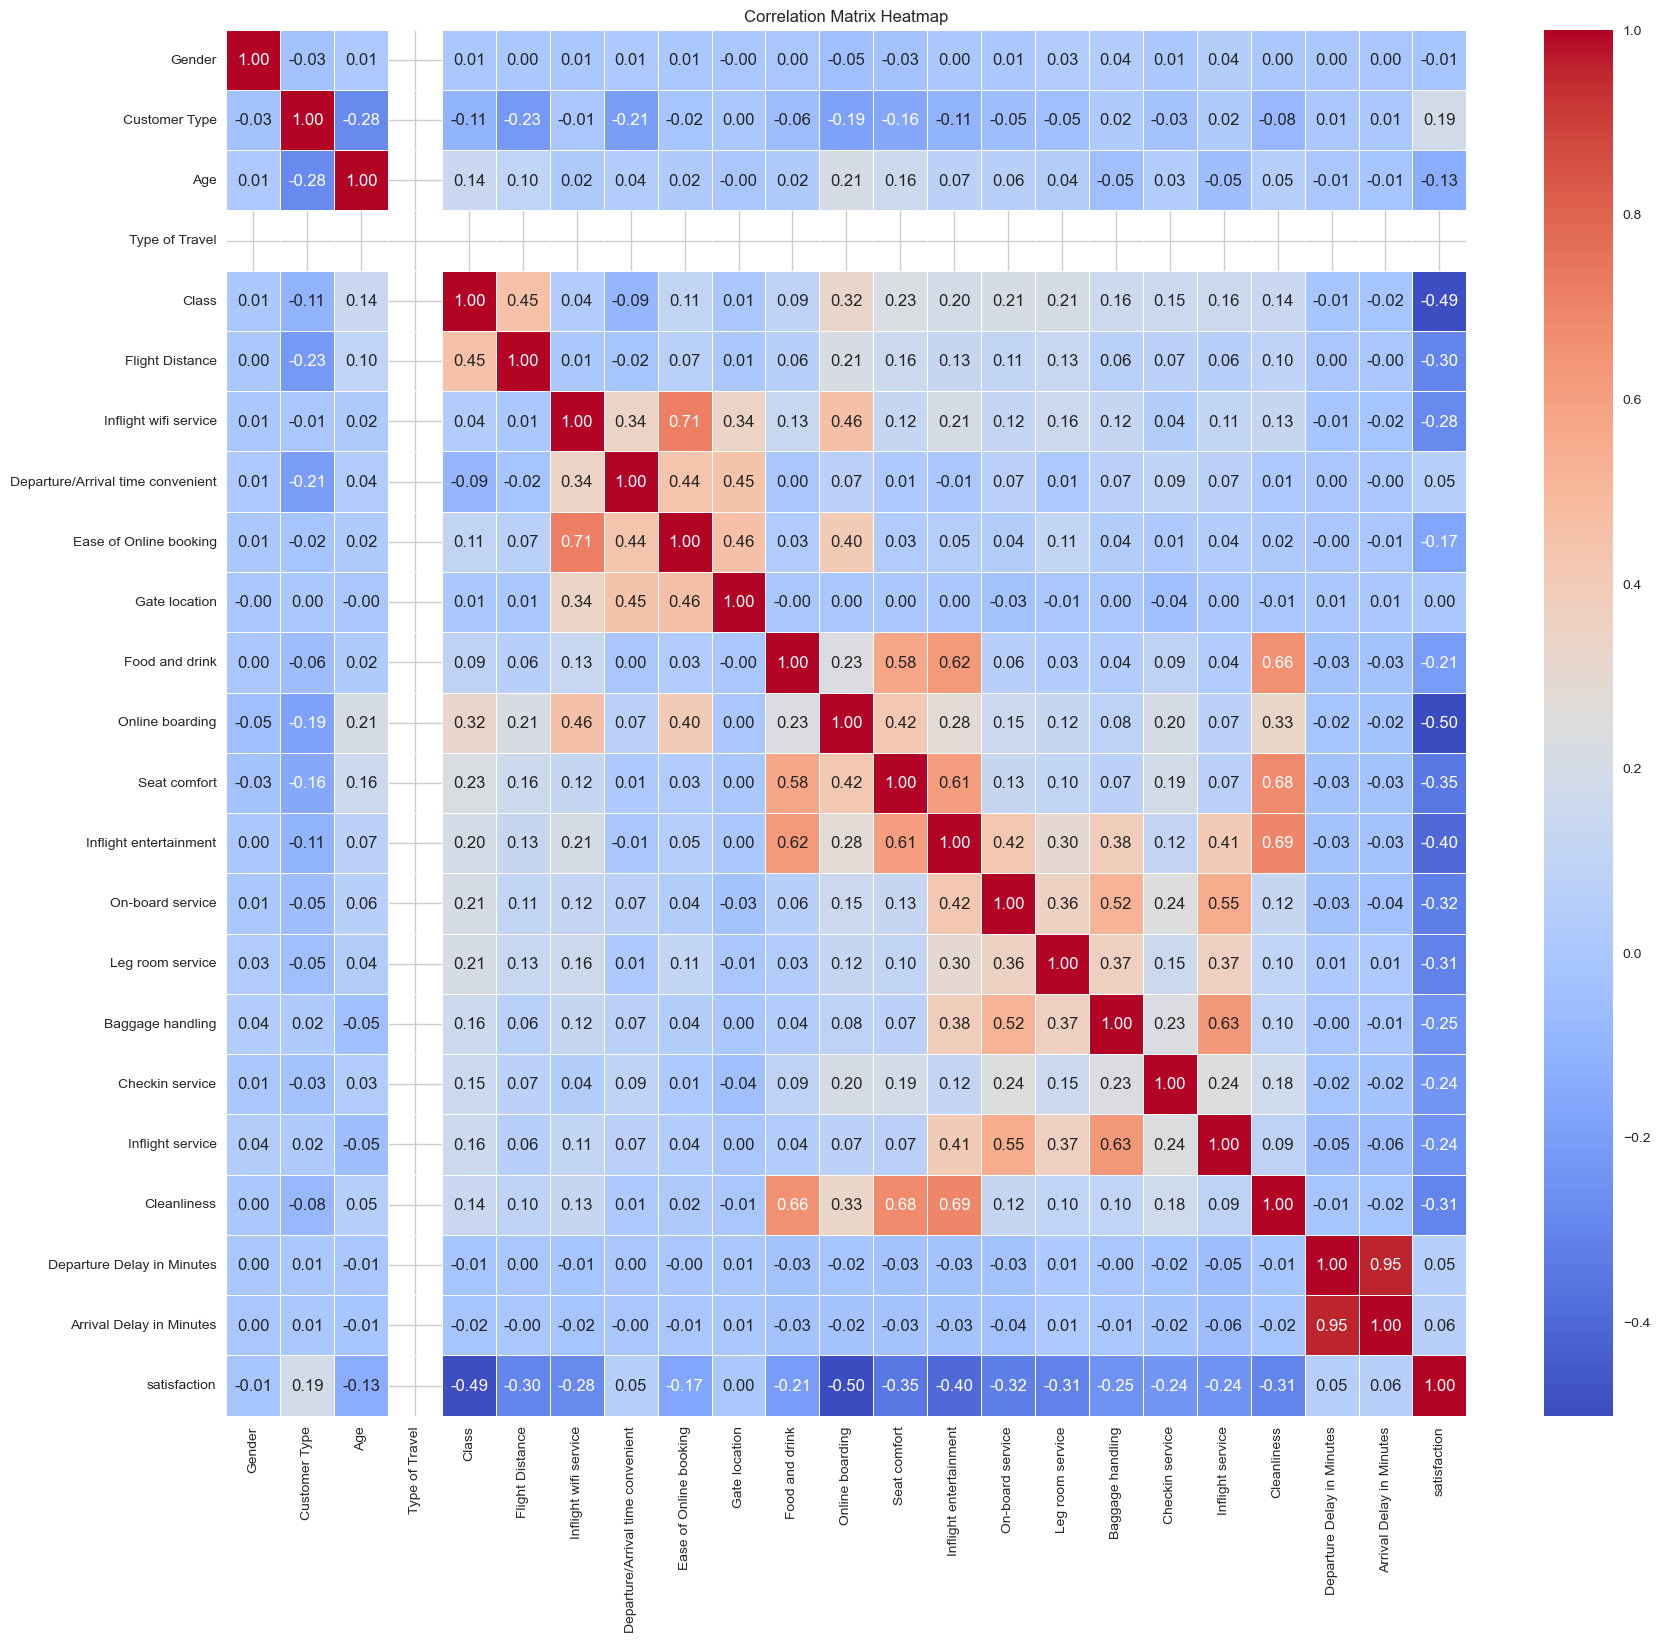

In [26]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set the figure size
plt.figure(figsize=(20, 18))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()


In [27]:
df.to_csv('df_before_ML.csv',index=False)

# ML modeling

# Train-Test Split: Data set is provided seperately with %20 for test and %80 for train data. In this evaluation they are combined and acted as 1 big data set like reallife data then split into train and test %80 and %20 accordingly.

## Most of the data given in 0-5 interval, however certain features can be changed dramatically for each row. So, scaling these columns could be beneficial for the ML models to perform better.

In [28]:
scaling_need=[]
for i in df.columns:
  a=len(list(df[i].unique()))
  if a>10:
    scaling_need.append(i)
print(scaling_need)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [29]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(1,5))

In [31]:
df[scaling_need]=scalar.fit_transform(df[scaling_need])

### If the dataset is to be evaluated separately as train and test. 

In [32]:
# Splitting the training set into features and target
# X_train = df.drop('satisfaction', axis=1)  # Features
# y_train = df['satisfaction']  # Target

# Splitting the test set into features and target
# X_test = df_test.drop('satisfaction', axis=1)  # Features
# y_test = df_test['satisfaction']  # Target

In [33]:
X = df.drop(columns="satisfaction")
y = df.satisfaction

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [36]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
           
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9080  2204]
 [ 1691 12996]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     11284
           1       0.85      0.88      0.87     14687

    accuracy                           0.85     25971
   macro avg       0.85      0.84      0.85     25971
weighted avg       0.85      0.85      0.85     25971


Train_Set
[[36504  8633]
 [ 6853 51893]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     45137
           1       0.86      0.88      0.87     58746

    accuracy                           0.85    103883
   macro avg       0.85      0.85      0.85    103883
weighted avg       0.85      0.85      0.85    103883



# GridSearchCV for Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()

C = [0.05, 0.1, 1]  # C arttıkça regülarizasyon düşer, alphanın tersi olarak
class_weight= ["balanced", None] 
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. 
# class_weight="balanced" kullanarak, modelin az temsil edilen sınıfın örneklerini doğru bir şekilde sınıflandırmaya
# daha fazla odaklanmasını sağlarız, bu genellikle bu sınıfın recall'ını artırabilir.


param_grid = {
    "penalty": ['l1', 'l2'],
    "C": C,
    "class_weight": class_weight,
    "solver": ['liblinear']
}

cv = StratifiedKFold(n_splits = 10) # unbalanced datalarda kullanılabilir

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "accuracy",   # Default olarak 1 sınıfının scorunu max. eder. 0 sınıfınınkini max. etmek isterseniz recall_0 = make_scorer(recall_score, pos_label =0)
                          n_jobs = -1,
                          verbose= 2,
                          return_train_score=True)


# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [38]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [39]:
grid_model.best_params_

{'C': 0.05, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[ 9078  2206]
 [ 1688 12999]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     11284
           1       0.85      0.89      0.87     14687

    accuracy                           0.85     25971
   macro avg       0.85      0.84      0.85     25971
weighted avg       0.85      0.85      0.85     25971


Train_Set
[[36533  8604]
 [ 6872 51874]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     45137
           1       0.86      0.88      0.87     58746

    accuracy                           0.85    103883
   macro avg       0.85      0.85      0.85    103883
weighted avg       0.85      0.85      0.85    103883



## %85 success is obtained. There is no sign of overfitting since, same results obtained in the train data. GridSearchCV didn't change much for LogisticRegression model.

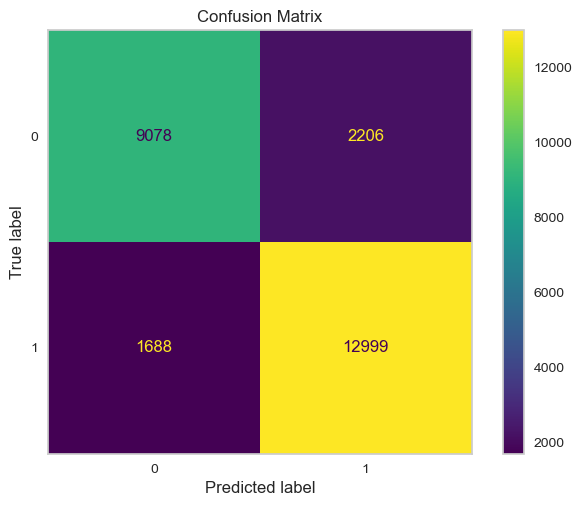

In [41]:
# Predict the labels for the test set
y_pred = grid_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')  # Use the 'viridis' colormap or any other colormap you prefer
plt.title('Confusion Matrix')

# Customize the plot: remove grid lines
plt.grid(False)

plt.show()

In [42]:
y_pred = grid_model.predict(X_test)

Log_acc_test = accuracy_score(y_test, y_pred)
Log_recall_test = recall_score(y_test, y_pred, average='weighted') # average= 'weighted' is used to take all recall scores into count and mitigate the effect of data imbalance.

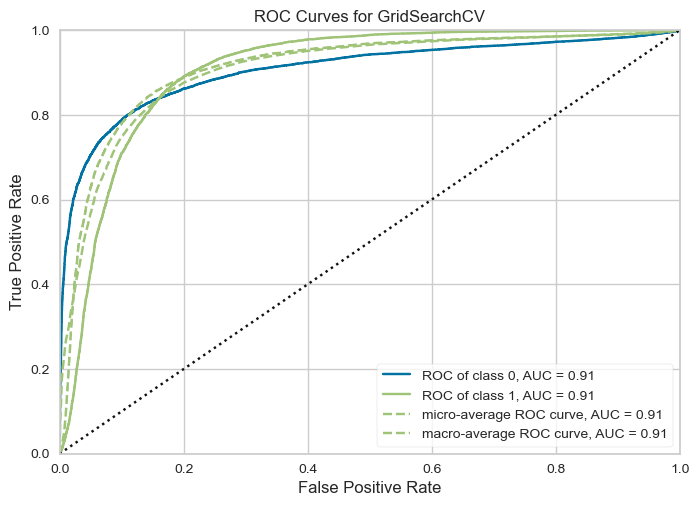

In [43]:
visualizer = ROCAUC(grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

# K-NN (K Nearest Neighbours)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)

In [45]:
#fit the model with trained data
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
eval_metric(model_knn, X_train, y_train, X_test, y_test)

Test_Set
[[10069  1215]
 [  602 14085]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     11284
           1       0.92      0.96      0.94     14687

    accuracy                           0.93     25971
   macro avg       0.93      0.93      0.93     25971
weighted avg       0.93      0.93      0.93     25971


Train_Set
[[41651  3486]
 [ 1725 57021]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     45137
           1       0.94      0.97      0.96     58746

    accuracy                           0.95    103883
   macro avg       0.95      0.95      0.95    103883
weighted avg       0.95      0.95      0.95    103883



In [47]:
y_pred = model_knn.predict(X_test)

knn_acc_test = accuracy_score(y_test, y_pred)
knn_recall_test = recall_score(y_test, y_pred, average='weighted') # average= 'weighted' is used to take all recall scores into count and mitigate the effect of data imbalance.

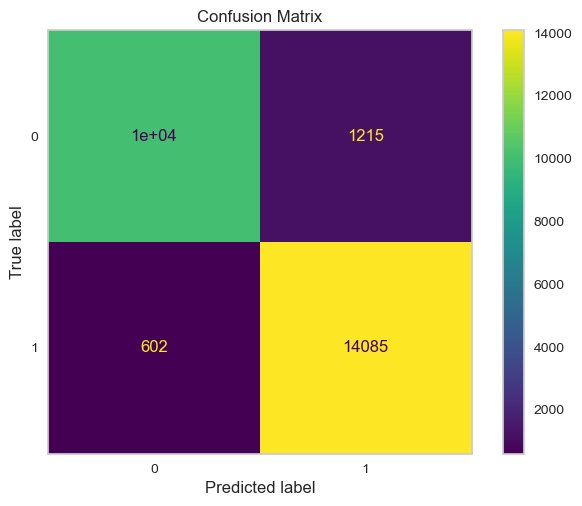

In [48]:
# Predict the labels for the test set
y_pred = model_knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')  # Use the 'viridis' colormap or any other colormap you prefer

plt.title('Confusion Matrix')

# Customize the plot: remove grid lines
plt.grid(False)
plt.show()

# Naive bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB

model_naive=MultinomialNB()

In [50]:
#fit the model with trained data
model_naive.fit(X_train,y_train)

MultinomialNB()

In [51]:
eval_metric(model_naive, X_train, y_train, X_test, y_test)

Test_Set
[[ 8498  2786]
 [ 2440 12247]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76     11284
           1       0.81      0.83      0.82     14687

    accuracy                           0.80     25971
   macro avg       0.80      0.79      0.79     25971
weighted avg       0.80      0.80      0.80     25971


Train_Set
[[33919 11218]
 [ 9773 48973]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76     45137
           1       0.81      0.83      0.82     58746

    accuracy                           0.80    103883
   macro avg       0.79      0.79      0.79    103883
weighted avg       0.80      0.80      0.80    103883



In [78]:
y_pred = model_naive.predict(X_test)

naive_acc_test = accuracy_score(y_test, y_pred)
naive_recall_test = recall_score(y_test, y_pred, average='weighted') # average= 'weighted' is used to take all recall scores into count and mitigate the effect of data imbalance.

# Random Forest Classifier

In [53]:
model_rf= RandomForestClassifier(random_state=42)

In [55]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [56]:
eval_metric(model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[10544   740]
 [  360 14327]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11284
           1       0.95      0.98      0.96     14687

    accuracy                           0.96     25971
   macro avg       0.96      0.95      0.96     25971
weighted avg       0.96      0.96      0.96     25971


Train_Set
[[45137     0]
 [    0 58746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45137
           1       1.00      1.00      1.00     58746

    accuracy                           1.00    103883
   macro avg       1.00      1.00      1.00    103883
weighted avg       1.00      1.00      1.00    103883



In [57]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[4,5],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [120,200],
             'n_estimators':[50,100],
             }

In [58]:
grid_model = GridSearchCV(model_rf, 
                          param_grid, 
                          scoring = "accuracy"
                          n_jobs=-1,
                          cv= 10,
                          verbose=2)

grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6], 'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [120, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [59]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 0.8,
 'max_leaf_nodes': 120,
 'n_estimators': 50}

In [60]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[10212  1072]
 [  899 13788]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11284
           1       0.93      0.94      0.93     14687

    accuracy                           0.92     25971
   macro avg       0.92      0.92      0.92     25971
weighted avg       0.92      0.92      0.92     25971


Train_Set
[[40863  4274]
 [ 3763 54983]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     45137
           1       0.93      0.94      0.93     58746

    accuracy                           0.92    103883
   macro avg       0.92      0.92      0.92    103883
weighted avg       0.92      0.92      0.92    103883



In [61]:
y_pred = grid_model.predict(X_test)

RF_acc_test = accuracy_score(y_test, y_pred)
RF_recall_test = recall_score(y_test, y_pred, average='weighted')

# XGboosting

In [62]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=42)

In [63]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [64]:
eval_metric(model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[10583   701]
 [  393 14294]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11284
           1       0.95      0.97      0.96     14687

    accuracy                           0.96     25971
   macro avg       0.96      0.96      0.96     25971
weighted avg       0.96      0.96      0.96     25971


Train_Set
[[43059  2078]
 [ 1094 57652]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     45137
           1       0.97      0.98      0.97     58746

    accuracy                           0.97    103883
   macro avg       0.97      0.97      0.97    103883
weighted avg       0.97      0.97      0.97    103883



In [65]:
# Define the parameter distributions
param_dist = {
    "n_estimators": [50, 75, 100, 150],
    'max_depth': [2, 3, 4, 7], 
    "learning_rate": [0.05, 0.1, 0.5],
    "subsample": [0.3, 0.5, 0.8],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Create RandomizedSearchCV instance
xgb_random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist,
    scoring='accuracy',
    verbose=2,
    cv=10,  # Cross-validation folds
    n_iter=50,  # Number of parameter settings that are sampled
    n_jobs=-1
)

# Fit the RandomizedSearchCV instance to the data
xgb_random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.05, 0.1, 0.5],
                                        'max_depth': [2, 3, 4, 7],
                                        'n_estimators': [50, 75, 100, 150],
                                        'subsample': [0.3, 0.5, 0.8]},
                   scoring='accuracy', verbose=2)

In [67]:
xgb_random_search.best_params_

{'subsample': 0.3,
 'n_estimators': 150,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [68]:
xgb_random_search.best_score_

0.9552477428567796

In [69]:
eval_metric(xgb_random_search, X_train, y_train, X_test, y_test)

Test_Set
[[10555   729]
 [  392 14295]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11284
           1       0.95      0.97      0.96     14687

    accuracy                           0.96     25971
   macro avg       0.96      0.95      0.96     25971
weighted avg       0.96      0.96      0.96     25971


Train_Set
[[42779  2358]
 [ 1190 57556]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     45137
           1       0.96      0.98      0.97     58746

    accuracy                           0.97    103883
   macro avg       0.97      0.96      0.97    103883
weighted avg       0.97      0.97      0.97    103883



In [70]:
y_pred = xgb_random_search.predict(X_test)

xgb_acc_test = accuracy_score(y_test, y_pred)
xgb_recall_test = recall_score(y_test, y_pred, average='weighted')

In [71]:
xgb_acc_test

0.9568364714489238

# Final Evaluation

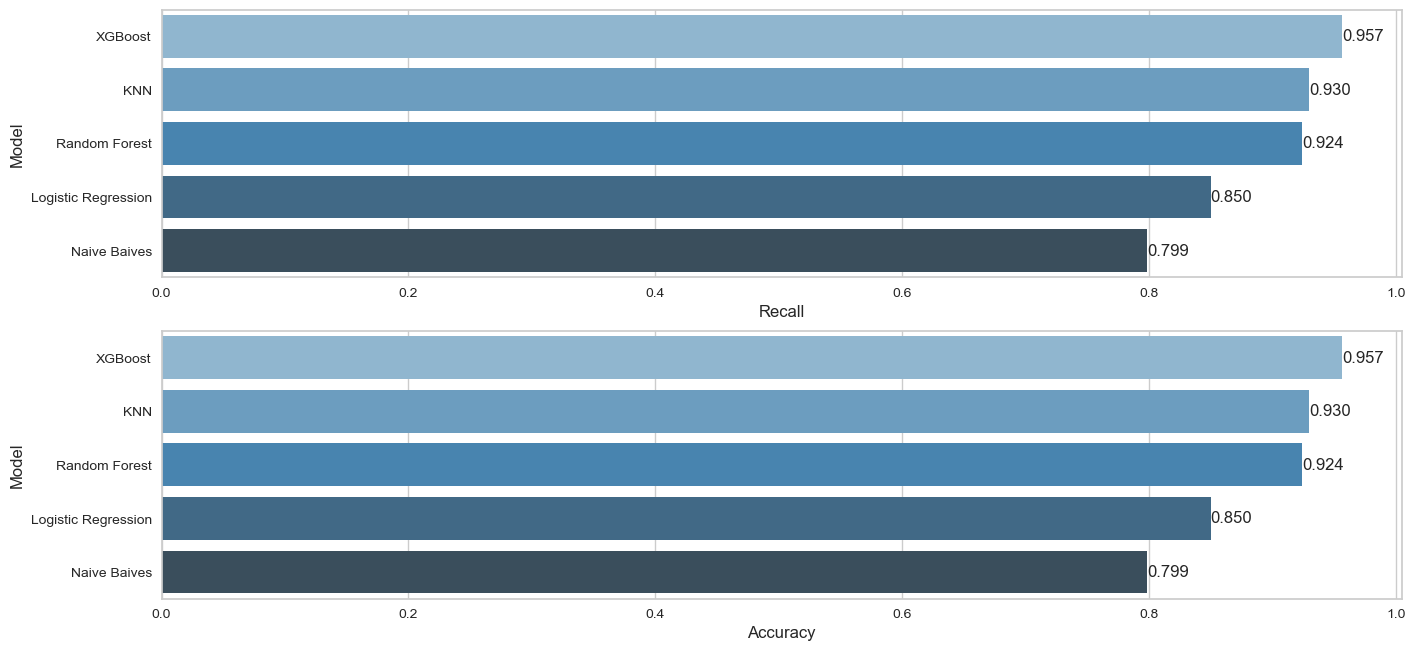

In [79]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "Naive Baives", "Random Forest", "XGBoost"],
                        "Accuracy": [Log_acc_test, knn_acc_test, naive_acc_test, RF_acc_test, xgb_acc_test],
                        "Recall": [Log_recall_test, knn_recall_test, naive_recall_test, RF_recall_test, xgb_recall_test],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(16,16))

plt.subplot(411)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)



plt.show()

# Processes Applied.

## Data is obtained in 2 parts, train and test then combined with concat function to learn and perform more natural data analysis processes.
## Only arrival in delay minutes column was slightly missing it is filled with median value , since the feature has many outliers and has positively skewed central tendency.
## Unnecessary columns were dropped (only 2). Then EDA processes started with multiple data visulations to understand the relations and the effect of the features in between and with target variable.
## Encoding is provided to str type or object type features to prepare data to further applications. Then MinMaxScaling is applied to the features with multiple values in a huge range with many outliers, to improve ML models success.
## Finally, data is splitted into train and test %80 and %20 accordingly then put in 5 different types of ML algorithms, then they are compared to each other to determine which type or types of algorithm works better with data set.

# Final verdict

# XGboosting performed slightly better in terms of accuracy, recall and it handles overfitting issues perfectly good according to our evaluations.